In [ ]:
!pip install geopandas
!pip install folium
!pip install lightgbm
!pip install utm
!pip install geojson 
!pip install haversine

# folium 한글 설치
!pip install git+https://github.com/python-visualization/branca.git@master

# 시각화 도구 설치
!pip install plotnine #R 시각화 
!pip install folium #지도 시각화 

In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
!pip install pickle5
import pickle5 as pickle

In [ ]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


In [ ]:
import pandas as pd
import pickle5 as pickle
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import folium 
import geopandas as gpd
import math
from tqdm.notebook import tqdm
import utm
from shapely.geometry import Point, Polygon
from haversine import haversine
from plotnine import *

## 1. 행정동 선형결합

In [ ]:
df_demand =pd.read_pickle('/content/drive/My Drive/Project/Seoul/지수_결과/인프라지수1109.pkl')
df_demand['행정동코드'] = df_demand['행정동코드'].astype(int)
df_demand

,행정동코드,행정동,시군구명,5-14세,키움센터_개수,초등돌봄교실_교실개수,지역아동센터_개수,방과후아카데미_개수,총시설수,시설tfidf,예술학원,보습학원개수,총학원수,학원tfidf,인프라지수,인프라지수_mmscaler,인프라지수percentile
0,1165065100,양재1동,서초구,5145,1.0,21.0,2.0,0.0,24.0,0.000011,35,17.0,52.0,0.000024,0.445650,0.000000,1
1,1153078000,오류제2동,구로구,4507,1.0,17.0,2.0,0.0,20.0,0.000062,44,26.0,70.0,0.000037,1.663341,0.002150,1
2,1150063000,방화제1동,강서구,4970,1.0,12.0,3.0,0.0,16.0,0.000101,42,47.0,89.0,0.000043,2.361944,0.003383,1
3,1138069000,진관동,은평구,7384,1.0,21.0,1.0,0.0,23.0,0.000015,37,27.0,64.0,0.000021,0.726752,0.000496,1
4,1138062500,역촌동,은평구,3381,1.0,6.0,4.0,0.0,11.0,0.000231,28,43.0,71.0,0.000050,4.592669,0.007321,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1114057000,필동,중구,180,0.0,0.0,0.0,0.0,0.0,0.007746,3,0.0,3.0,0.000052,147.621518,0.259835,10
420,1114059000,광희동,중구,170,0.0,0.0,0.0,0.0,0.0,0.008202,1,0.0,1.0,0.000028,295.243036,0.520456,10
421,1111054000,삼청동,종로구,165,0.0,0.0,0.0,0.0,0.0,0.008450,1,0.0,1.0,0.000029,295.243036,0.520456,10
422,1114060500,을지로동,중구,44,0.0,0.0,0.0,0.0,0.0,0.031689,2,0.0,2.0,0.000161,196.828690,0.346709,10


In [ ]:
df_alone = pd.read_csv("/content/drive/My Drive/Project/Seoul/지수_결과/생산반영 최종 돌봄 틈새공백 인구.csv")
df_alone

,Unnamed: 0,행정동코드,시군구명,행정동명,돌봄 틈새공백 인구,동별 돌봄 틈새공백 인구 비율,돌봄틈새공백 분위
0,266,1171067000,송파구,잠실2동,245.271698,0.038951,10
1,390,1138069000,은평구,진관동,232.025038,0.031423,10
2,82,1147055000,양천구,목5동,227.289733,0.034485,10
3,356,1129066000,성북구,길음1동,199.337618,0.037575,10
4,279,1171064700,송파구,위례동,191.574512,0.041323,10
...,...,...,...,...,...,...,...
419,44,1111067000,종로구,창신1동,3.669603,0.021090,1
420,41,1111063000,종로구,종로5·6가동,3.179372,0.021777,1
421,54,1114055000,중구,명동,3.086438,0.024891,1
422,56,1114060500,중구,을지로동,1.046476,0.023784,1


In [ ]:
df_alone.sort_values(by = '돌봄틈새공백 분위', ascending=False)

,Unnamed: 0,행정동코드,시군구명,행정동명,돌봄 틈새공백 인구,동별 돌봄 틈새공백 인구 비율,돌봄틈새공백 분위
0,266,1171067000,송파구,잠실2동,245.271698,0.038951,10
22,166,1153051000,구로구,신도림동,136.424929,0.035444,10
24,108,1168065600,강남구,도곡2동,129.734152,0.030206,10
25,180,1165054000,서초구,잠원동,127.947428,0.036082,10
26,139,1144074000,마포구,상암동,124.601772,0.030919,10
...,...,...,...,...,...,...,...
396,385,1138065000,은평구,수색동,11.504864,0.025912,1
397,34,1111069000,종로구,창신3동,11.339821,0.025256,1
398,309,1121571000,광진구,화양동,10.715003,0.022047,1
399,22,1159052000,동작구,노량진2동,10.394892,0.024988,1


In [ ]:
# 소득 k=3
with open('/content/drive/My Drive/Project/Seoul/가공데이터/동3개/지수결과/행정동별_소득분위k=3_robustx.pkl', 'rb') as f:  
  df_income = pickle.load(f)
df_income

,행정동코드,읍면동명,시군구명,추정소득 k=3,소득분위
0,1171063100,가락1동,송파구,1075.939437,3
1,1171063200,가락2동,송파구,795.380296,5
2,1171062000,가락본동,송파구,883.647799,4
3,1153059500,가리봉동,구로구,286.246082,10
4,1154551000,가산동,금천구,415.400591,10
...,...,...,...,...,...
419,1117058000,효창동,용산구,679.568874,6
420,1117051000,후암동,용산구,531.189708,8
421,1123072000,휘경제1동,동대문구,623.533827,7
422,1123073000,휘경제2동,동대문구,686.604532,6


In [ ]:
df_income.sort_values(by = '소득분위', ascending=False)

,행정동코드,읍면동명,시군구명,추정소득 k=3,소득분위
344,1114058000,장충동,중구,249.667757,10
79,1132052100,도봉제1동,도봉구,392.495243,10
254,1147061100,신월7동,양천구,285.492971,10
36,1138056000,구산동,은평구,389.533841,10
262,1132066000,쌍문제1동,도봉구,323.761117,10
...,...,...,...,...,...
271,1168054500,압구정동,강남구,2094.639886,1
59,1168053100,논현2동,강남구,1455.530854,1
266,1144055500,아현동,마포구,1521.597400,1
187,1144066000,서교동,마포구,1711.878350,1


#### merge

In [ ]:
df_demand['행정동코드'] = df_demand['행정동코드'].astype(int)
df_alone['행정동코드'] = df_alone['행정동코드'].astype(int)
df_income['행정동코드'] = df_income['행정동코드'].astype(int)


df_1 = df_demand.merge(df_alone, on = '행정동코드')
df_final = df_1.merge(df_income, on='행정동코드')

df_final = df_final[['행정동코드', '시군구명_x', '행정동명', '인프라지수','돌봄 틈새공백 인구','추정소득 k=3']]
df_final.columns = ['행정동코드', '시군구', '행정동명', '인프라지수','돌봄틈새공백인구','추정소득']
df_final

,행정동코드,시군구,행정동명,인프라지수,돌봄틈새공백인구,추정소득
0,1165065100,서초구,양재1동,0.445650,188.321919,1145.104140
1,1153078000,구로구,오류2동,1.663341,147.529763,900.900901
2,1150063000,강서구,방화1동,2.361944,165.175449,793.541070
3,1138069000,은평구,진관동,0.726752,232.025038,710.188053
4,1138062500,은평구,역촌동,4.592669,101.616277,225.864927
...,...,...,...,...,...,...
419,1114057000,중구,필동,147.621518,4.230159,561.980451
420,1114059000,중구,광희동,295.243036,4.006454,959.067682
421,1111054000,종로구,삼청동,295.243036,4.376760,805.849309
422,1114060500,중구,을지로동,196.828690,1.046476,470.294486


In [ ]:
df_final['추정소득_inverse'] = df_final['추정소득'].max() - df_final['추정소득']
X = df_final[['인프라지수', '돌봄틈새공백인구', '추정소득_inverse']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)


df_X = pd.DataFrame(X_scale, columns = ['인프라', '돌봄공백', '소득'])
df_final['인프라지수']  = df_X['인프라']
df_final['돌봄틈새공백인구']  = df_X['돌봄공백']
df_final['추정소득']  = df_X['소득']

df_final['MinMax_수요지수'] =  pd.DataFrame(X_scale.sum(axis=1))
df_final.sort_values(by='MinMax_수요지수', ascending=False)

,행정동코드,시군구,행정동명,인프라지수,돌봄틈새공백인구,추정소득,추정소득_inverse,MinMax_수요지수
290,1130560300,강북구,번2동,1.000000,0.090246,0.887746,2212.096366,1.977992
3,1138069000,은평구,진관동,0.000496,0.945904,0.798769,1990.383478,1.745169
271,1147055000,양천구,목5동,0.003249,0.926566,0.764156,1904.132342,1.693970
15,1129066000,성북구,길음1동,0.008574,0.812416,0.781821,1948.151396,1.602811
115,1150061500,강서구,우장산동,0.007732,0.707576,0.808261,2014.034089,1.523569
...,...,...,...,...,...,...,...,...
211,1165060000,서초구,방배1동,0.023041,0.176335,0.269686,672.007662,0.469063
352,1168051000,강남구,신사동,0.008836,0.183984,0.265030,660.406135,0.457850
312,1168067000,강남구,개포2동,0.018966,0.236583,0.151312,377.039901,0.406860
273,1117070000,용산구,보광동,0.086403,0.060083,0.244962,610.400039,0.391448


In [ ]:
df_final.sort_values(by='인프라지수', ascending=False)

,행정동코드,시군구,행정동명,인프라지수,돌봄틈새공백인구,추정소득,추정소득_inverse,MinMax_수요지수,동별_필요센터수
290,1130560300,강북구,번2동,1.000000,0.090246,0.887746,2212.096366,1.977992,1.827809
420,1114059000,중구,광희동,0.520456,0.014728,0.698891,1741.503849,1.234074,1.140375
418,1114054000,중구,회현동,0.520456,0.018584,0.890201,2218.214704,1.429241,1.320724
417,1111071000,종로구,숭인2동,0.520456,0.028092,0.711392,1772.656420,1.259941,1.164278
421,1111054000,종로구,삼청동,0.520456,0.016240,0.760379,1894.722222,1.297075,1.198593
...,...,...,...,...,...,...,...,...,...
68,1159066000,동작구,대방동,0.003212,0.407606,0.654463,1630.798224,1.065281,0.984397
1,1153078000,구로구,오류2동,0.002150,0.600844,0.722234,1799.670630,1.325228,1.224607
7,1168070000,강남구,세곡동,0.001199,0.770175,0.572418,1426.358039,1.343792,1.241762
3,1138069000,은평구,진관동,0.000496,0.945904,0.798769,1990.383478,1.745169,1.612664


In [ ]:
df_final.sort_values(by='MinMax_수요지수', ascending=False)

,행정동코드,시군구,행정동명,인프라지수,돌봄틈새공백인구,추정소득,추정소득_inverse,MinMax_수요지수
290,1130560300,강북구,번2동,1.000000,0.090246,0.887746,2212.096366,1.977992
3,1138069000,은평구,진관동,0.000496,0.945904,0.798769,1990.383478,1.745169
271,1147055000,양천구,목5동,0.003249,0.926566,0.764156,1904.132342,1.693970
15,1129066000,성북구,길음1동,0.008574,0.812416,0.781821,1948.151396,1.602811
115,1150061500,강서구,우장산동,0.007732,0.707576,0.808261,2014.034089,1.523569
...,...,...,...,...,...,...,...,...
211,1165060000,서초구,방배1동,0.023041,0.176335,0.269686,672.007662,0.469063
352,1168051000,강남구,신사동,0.008836,0.183984,0.265030,660.406135,0.457850
312,1168067000,강남구,개포2동,0.018966,0.236583,0.151312,377.039901,0.406860
273,1117070000,용산구,보광동,0.086403,0.060083,0.244962,610.400039,0.391448


In [ ]:
df_final.corr()

,행정동코드,인프라지수,돌봄틈새공백인구,추정소득,추정소득_inverse,MinMax_수요지수
행정동코드,1.000000,-0.308202,0.319426,-0.233076,-0.233076,-0.074957
인프라지수,-0.308202,1.000000,-0.380773,-0.019525,-0.019525,0.124342
돌봄틈새공백인구,0.319426,-0.380773,1.000000,-0.197434,-0.197434,0.473571
추정소득,-0.233076,-0.019525,-0.197434,1.000000,1.000000,0.669101
추정소득_inverse,-0.233076,-0.019525,-0.197434,1.000000,1.000000,0.669101
MinMax_수요지수,-0.074957,0.124342,0.473571,0.669101,0.669101,1.000000


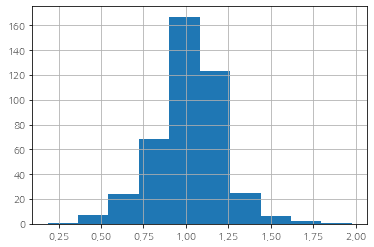

In [ ]:
df_final['MinMax_수요지수'].hist()

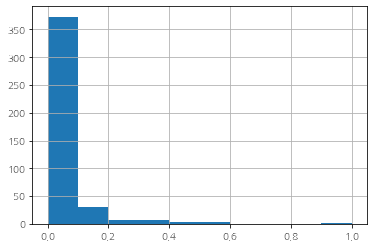

In [ ]:
df_final['인프라지수'].hist()

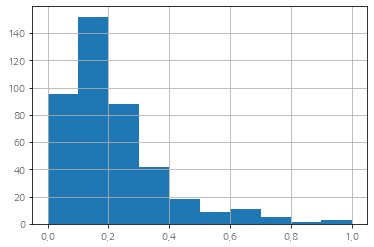

In [ ]:
df_final['돌봄틈새공백인구'].hist()

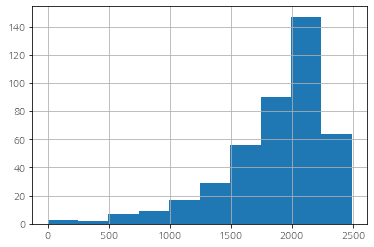

In [ ]:
df_final['추정소득_inverse'].hist()

## 현재 키움센터 개수와 비교

공식 = 동별 점수*91 / Sum(동별 점수의 합) - 현재 동별 센터의 개수

In [ ]:
df_supply = pd.read_pickle('/content/drive/My Drive/Project/Seoul/가공데이터/행정동별_주변공적돌봄시설.pickle')
df_supply

,행정동코드,시군구명,읍면동명,키움센터_상시돌봄정원,키움센터_일시돌봄정원,키움센터_개수,초등돌봄교실_이용인원,초등돌봄교실_교실개수,지역아동센터_정원,지역아동센터_개수,방과후아카데미_정원,방과후아카데미_개수
0,1111053000,종로구,사직동,0.0,0.0,0.0,65.0,3.0,0.0,0.0,0.0,0.0
1,1111054000,종로구,삼청동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1111055000,종로구,부암동,0.0,0.0,0.0,111.0,5.0,0.0,0.0,0.0,0.0
3,1111056000,종로구,평창동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1111057000,종로구,무악동,0.0,0.0,0.0,80.0,4.0,35.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
420,1174070000,강동구,둔촌제2동,0.0,0.0,0.0,153.0,7.0,50.0,1.0,0.0,0.0
421,1174057000,강동구,암사제1동,20.0,4.0,1.0,97.0,4.0,71.0,2.0,0.0,0.0
422,1174061000,강동구,천호제2동,0.0,0.0,0.0,100.0,4.0,59.0,2.0,0.0,0.0
423,1174068500,강동구,길동,0.0,0.0,0.0,255.0,13.0,129.0,5.0,0.0,0.0


In [ ]:
Sum = df_final['MinMax_수요지수'].sum()
print(Sum)

df_final['동별_필요센터수'] = df_final[['MinMax_수요지수']].apply(lambda x: x*400 / Sum)
df_final

432.8661002926895


,행정동코드,시군구,행정동명,인프라지수,돌봄틈새공백인구,추정소득,추정소득_inverse,MinMax_수요지수,동별_필요센터수
0,1165065100,서초구,양재1동,0.000000,0.767430,0.624231,1555.467391,1.391661,1.285997
1,1153078000,구로구,오류2동,0.002150,0.600844,0.722234,1799.670630,1.325228,1.224607
2,1150063000,강서구,방화1동,0.003383,0.672905,0.765319,1907.030461,1.441607,1.332151
3,1138069000,은평구,진관동,0.000496,0.945904,0.798769,1990.383478,1.745169,1.612664
4,1138062500,은평구,역촌동,0.007321,0.413344,0.993135,2474.706604,1.413801,1.306455
...,...,...,...,...,...,...,...,...,...
419,1114057000,중구,필동,0.259835,0.015641,0.858247,2138.591079,1.133723,1.047643
420,1114059000,중구,광희동,0.520456,0.014728,0.698891,1741.503849,1.234074,1.140375
421,1111054000,종로구,삼청동,0.520456,0.016240,0.760379,1894.722222,1.297075,1.198593
422,1114060500,중구,을지로동,0.346709,0.002640,0.895042,2230.277045,1.244391,1.149908


In [ ]:
df_final.merge(df_supply[['행정동코드', '키움센터_개수']])

,행정동코드,시군구,행정동명,인프라지수,돌봄틈새공백인구,추정소득,추정소득_inverse,MinMax_수요지수,동별_필요센터수,키움센터_개수
0,1165065100,서초구,양재1동,0.000000,0.767430,0.624231,1555.467391,1.391661,1.285997,1.0
1,1153078000,구로구,오류2동,0.002150,0.600844,0.722234,1799.670630,1.325228,1.224607,1.0
2,1150063000,강서구,방화1동,0.003383,0.672905,0.765319,1907.030461,1.441607,1.332151,1.0
3,1138069000,은평구,진관동,0.000496,0.945904,0.798769,1990.383478,1.745169,1.612664,1.0
4,1138062500,은평구,역촌동,0.007321,0.413344,0.993135,2474.706604,1.413801,1.306455,1.0
...,...,...,...,...,...,...,...,...,...,...
419,1114057000,중구,필동,0.259835,0.015641,0.858247,2138.591079,1.133723,1.047643,0.0
420,1114059000,중구,광희동,0.520456,0.014728,0.698891,1741.503849,1.234074,1.140375,0.0
421,1111054000,종로구,삼청동,0.520456,0.016240,0.760379,1894.722222,1.297075,1.198593,0.0
422,1114060500,중구,을지로동,0.346709,0.002640,0.895042,2230.277045,1.244391,1.149908,0.0


In [ ]:
df_merge = df_final.merge(df_supply[['행정동코드', '키움센터_개수']])
df_merge['공급미달점수'] = df_merge[['동별_필요센터수', '키움센터_개수']].apply(lambda x: x['동별_필요센터수']-x['키움센터_개수'], axis=1)
df_merge

,행정동코드,시군구,행정동명,인프라지수,돌봄틈새공백인구,추정소득,추정소득_inverse,MinMax_수요지수,동별_필요센터수,키움센터_개수,공급미달점수
0,1165065100,서초구,양재1동,0.000000,0.767430,0.624231,1555.467391,1.391661,1.285997,1.0,0.285997
1,1153078000,구로구,오류2동,0.002150,0.600844,0.722234,1799.670630,1.325228,1.224607,1.0,0.224607
2,1150063000,강서구,방화1동,0.003383,0.672905,0.765319,1907.030461,1.441607,1.332151,1.0,0.332151
3,1138069000,은평구,진관동,0.000496,0.945904,0.798769,1990.383478,1.745169,1.612664,1.0,0.612664
4,1138062500,은평구,역촌동,0.007321,0.413344,0.993135,2474.706604,1.413801,1.306455,1.0,0.306455
...,...,...,...,...,...,...,...,...,...,...,...
419,1114057000,중구,필동,0.259835,0.015641,0.858247,2138.591079,1.133723,1.047643,0.0,1.047643
420,1114059000,중구,광희동,0.520456,0.014728,0.698891,1741.503849,1.234074,1.140375,0.0,1.140375
421,1111054000,종로구,삼청동,0.520456,0.016240,0.760379,1894.722222,1.297075,1.198593,0.0,1.198593
422,1114060500,중구,을지로동,0.346709,0.002640,0.895042,2230.277045,1.244391,1.149908,0.0,1.149908


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


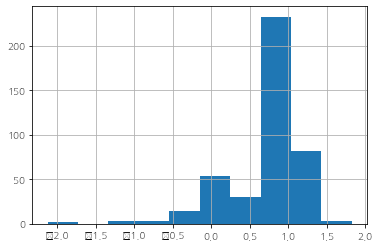

In [ ]:
df_merge['공급미달점수'].hist()

In [ ]:
df_merge.sort_values(by='공급미달점수', ascending = False).head(20)

,행정동코드,시군구,행정동명,인프라지수,돌봄틈새공백인구,추정소득,추정소득_inverse,MinMax_수요지수,동별_필요센터수,키움센터_개수,공급미달점수
290,1130560300,강북구,번2동,1.000000,0.090246,0.887746,2212.096366,1.977992,1.827809,0.0,1.827809
271,1147055000,양천구,목5동,0.003249,0.926566,0.764156,1904.132342,1.693970,1.565352,0.0,1.565352
15,1129066000,성북구,길음1동,0.008574,0.812416,0.781821,1948.151396,1.602811,1.481115,0.0,1.481115
115,1150061500,강서구,우장산동,0.007732,0.707576,0.808261,2014.034089,1.523569,1.407890,0.0,1.407890
265,1121581000,광진구,광장동,0.008149,0.680459,0.768797,1915.697651,1.457404,1.346749,0.0,1.346749
418,1114054000,중구,회현동,0.520456,0.018584,0.890201,2218.214704,1.429241,1.320724,0.0,1.320724
48,1150061100,강서구,발산1동,0.004199,0.629068,0.795772,1982.914686,1.429039,1.320536,0.0,1.320536
304,1135062100,노원구,중계1동,0.007553,0.628474,0.745444,1857.505981,1.381471,1.276580,0.0,1.276580
293,1147051000,양천구,목1동,0.006351,0.716303,0.639469,1593.436310,1.362123,1.258701,0.0,1.258701
281,1171067000,송파구,잠실2동,0.016272,1.000000,0.331516,826.075387,1.347788,1.245455,0.0,1.245455


In [ ]:
# 1순위 -> 먼저 설치해야 함
pt_list = np.percentile(df_merge[['공급미달점수']],[i*10 for i in range(2,10,2)]).tolist()

df_merge['공급미달점수_우선순위'] = 0
df_merge.loc[df_merge['공급미달점수'] <= pt_list[0], '공급미달점수_우선순위'] = 5
df_merge.loc[(df_merge['공급미달점수'] > pt_list[0]) & (df_merge['공급미달점수'] <= pt_list[1]),'공급미달점수_우선순위'] = 4
df_merge.loc[(df_merge['공급미달점수'] > pt_list[1]) & (df_merge['공급미달점수'] <= pt_list[2]),'공급미달점수_우선순위'] = 3
df_merge.loc[(df_merge['공급미달점수'] > pt_list[2]) & (df_merge['공급미달점수'] <= pt_list[3]),'공급미달점수_우선순위'] = 2
df_merge.loc[(df_merge['공급미달점수'] > pt_list[3]),'공급미달점수_우선순위'] = 1
df_merge

,행정동코드,시군구,행정동명,인프라지수,돌봄틈새공백인구,추정소득,추정소득_inverse,MinMax_수요지수,동별_필요센터수,키움센터_개수,공급미달점수,공급미달점수_우선순위
0,1165065100,서초구,양재1동,0.000000,0.767430,0.624231,1555.467391,1.391661,1.285997,1.0,0.285997,5
1,1153078000,구로구,오류2동,0.002150,0.600844,0.722234,1799.670630,1.325228,1.224607,1.0,0.224607,5
2,1150063000,강서구,방화1동,0.003383,0.672905,0.765319,1907.030461,1.441607,1.332151,1.0,0.332151,5
3,1138069000,은평구,진관동,0.000496,0.945904,0.798769,1990.383478,1.745169,1.612664,1.0,0.612664,4
4,1138062500,은평구,역촌동,0.007321,0.413344,0.993135,2474.706604,1.413801,1.306455,1.0,0.306455,5
...,...,...,...,...,...,...,...,...,...,...,...,...
419,1114057000,중구,필동,0.259835,0.015641,0.858247,2138.591079,1.133723,1.047643,0.0,1.047643,1
420,1114059000,중구,광희동,0.520456,0.014728,0.698891,1741.503849,1.234074,1.140375,0.0,1.140375,1
421,1111054000,종로구,삼청동,0.520456,0.016240,0.760379,1894.722222,1.297075,1.198593,0.0,1.198593,1
422,1114060500,중구,을지로동,0.346709,0.002640,0.895042,2230.277045,1.244391,1.149908,0.0,1.149908,1


In [ ]:
df_all = df_merge.merge(df_supply[['행정동코드','초등돌봄교실_교실개수','지역아동센터_개수','방과후아카데미_개수']]).sort_values(by='공급미달점수', ascending = False)
df_all.head(10)

,행정동코드,시군구,행정동명,인프라지수,돌봄틈새공백인구,추정소득,추정소득_inverse,MinMax_수요지수,동별_필요센터수,키움센터_개수,공급미달점수,공급미달점수_우선순위,초등돌봄교실_교실개수,지역아동센터_개수,방과후아카데미_개수
290,1130560300,강북구,번2동,1.000000,0.090246,0.887746,2212.096366,1.977992,1.827809,0.0,1.827809,1,0.0,1.0,0.0
271,1147055000,양천구,목5동,0.003249,0.926566,0.764156,1904.132342,1.693970,1.565352,0.0,1.565352,1,10.0,0.0,0.0
15,1129066000,성북구,길음1동,0.008574,0.812416,0.781821,1948.151396,1.602811,1.481115,0.0,1.481115,1,13.0,1.0,0.0
115,1150061500,강서구,우장산동,0.007732,0.707576,0.808261,2014.034089,1.523569,1.407890,0.0,1.407890,1,5.0,1.0,0.0
265,1121581000,광진구,광장동,0.008149,0.680459,0.768797,1915.697651,1.457404,1.346749,0.0,1.346749,1,13.0,0.0,0.0
418,1114054000,중구,회현동,0.520456,0.018584,0.890201,2218.214704,1.429241,1.320724,0.0,1.320724,1,0.0,0.0,0.0
48,1150061100,강서구,발산1동,0.004199,0.629068,0.795772,1982.914686,1.429039,1.320536,0.0,1.320536,1,13.0,1.0,0.0
304,1135062100,노원구,중계1동,0.007553,0.628474,0.745444,1857.505981,1.381471,1.276580,0.0,1.276580,1,4.0,0.0,0.0
293,1147051000,양천구,목1동,0.006351,0.716303,0.639469,1593.436310,1.362123,1.258701,0.0,1.258701,1,6.0,0.0,0.0
281,1171067000,송파구,잠실2동,0.016272,1.000000,0.331516,826.075387,1.347788,1.245455,0.0,1.245455,1,7.0,0.0,0.0


In [ ]:
df_all.groupby('공급미달점수_우선순위', as_index=False).agg('mean').drop('행정동코드', axis=1)

,공급미달점수_우선순위,인프라지수,돌봄틈새공백인구,추정소득,추정소득_inverse,MinMax_수요지수,동별_필요센터수,키움센터_개수,공급미달점수,초등돌봄교실_교실개수,지역아동센터_개수,방과후아카데미_개수
0,1,0.087601,0.314103,0.834530,2079.492629,1.236233,1.142370,0.000000,1.142370,5.470588,1.200000,0.023529
1,2,0.044809,0.170830,0.857940,2137.824912,1.073579,0.992066,0.000000,0.992066,4.600000,1.400000,0.058824
2,3,0.045138,0.158446,0.771563,1922.590442,0.975148,0.901108,0.000000,0.901108,4.083333,1.035714,0.011905
3,4,0.056342,0.165327,0.576235,1435.868831,0.797904,0.737322,0.011765,0.725557,3.941176,0.800000,0.047059
4,5,0.039878,0.259232,0.722040,1799.188465,1.021150,0.943618,1.058824,-0.115206,6.105882,0.941176,0.070588


In [ ]:
df_all.to_excel('/content/drive/My Drive/Project/Seoul/1109_선형결합_행정동_오차계산.xlsx', index=False)

In [ ]:
len(df_all[df_all['공급미달점수_우선순위']==1]), len(df_all[df_all['공급미달점수_우선순위']==2]), len(df_all[df_all['공급미달점수_우선순위']==3]), len(df_all[df_all['공급미달점수_우선순위']==4]), len(df_all[df_all['공급미달점수_우선순위']==5])

(85, 85, 84, 85, 85)

## 시각화

In [ ]:
dong_geo = gpd.read_file('/content/drive/My Drive/Project/Seoul/서울시_행정동경계/hangjeongdong_boundary.geojson')
dong_geo

,행정동코드,시군구명,읍면동명,위도,경도,geometry
0,1111053000,종로구,사직동,37.574108,126.970144,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,1111054000,종로구,삼청동,37.588013,126.981114,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,1111055000,종로구,부암동,37.596699,126.962557,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,1111056000,종로구,평창동,37.613965,126.969274,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,1111057000,종로구,무악동,37.577741,126.958989,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."
...,...,...,...,...,...,...
419,1174069000,강동구,둔촌제1동,37.523145,127.140435,"MULTIPOLYGON (((127.14580 37.52199, 127.14564 ..."
420,1174070000,강동구,둔촌제2동,37.531514,127.147414,"MULTIPOLYGON (((127.15355 37.53400, 127.15357 ..."
421,1174057000,강동구,암사제1동,37.551855,127.134586,"MULTIPOLYGON (((127.14447 37.55477, 127.14319 ..."
422,1174061000,강동구,천호제2동,37.544691,127.122275,"MULTIPOLYGON (((127.13458 37.54712, 127.13115 ..."


In [ ]:
df_eda = dong_geo.merge(df_all, on='행정동코드')
df_eda

,행정동코드,시군구명,읍면동명,위도,경도,geometry,시군구,행정동명,인프라지수,돌봄틈새공백인구,추정소득,추정소득_inverse,MinMax_수요지수,동별_필요센터수,키움센터_개수,공급미달점수,공급미달점수_우선순위,초등돌봄교실_교실개수,지역아동센터_개수,방과후아카데미_개수
0,1111053000,종로구,사직동,37.574108,126.970144,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...",종로구,사직동,0.056550,0.078966,0.693621,1728.372998,0.829137,0.766183,0.0,0.766183,4,3.0,0.0,0.0
1,1111054000,종로구,삼청동,37.588013,126.981114,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ...",종로구,삼청동,0.520456,0.016240,0.760379,1894.722222,1.297075,1.198593,0.0,1.198593,1,0.0,0.0,0.0
2,1111055000,종로구,부암동,37.596699,126.962557,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ...",종로구,부암동,0.051338,0.084972,0.874116,2178.133163,1.010425,0.933707,0.0,0.933707,3,5.0,0.0,0.0
3,1111056000,종로구,평창동,37.613965,126.969274,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ...",종로구,평창동,0.103462,0.142053,0.876802,2184.824580,1.122316,1.037103,0.0,1.037103,2,0.0,0.0,0.0
4,1111057000,종로구,무악동,37.577741,126.958989,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ...",종로구,무악동,0.082612,0.103551,0.662716,1651.364246,0.848879,0.784427,0.0,0.784427,4,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1174069000,강동구,둔촌제1동,37.523145,127.140435,"MULTIPOLYGON (((127.14580 37.52199, 127.14564 ...",강동구,둔촌1동,0.346709,0.000000,0.625872,1559.554468,0.972580,0.898735,0.0,0.898735,3,0.0,0.0,0.0
420,1174070000,강동구,둔촌제2동,37.531514,127.147414,"MULTIPOLYGON (((127.15355 37.53400, 127.15357 ...",강동구,둔촌2동,0.014966,0.240993,0.804667,2005.080035,1.060627,0.980097,0.0,0.980097,2,7.0,1.0,0.0
421,1174057000,강동구,암사제1동,37.551855,127.134586,"MULTIPOLYGON (((127.14447 37.55477, 127.14319 ...",강동구,암사1동,0.020063,0.304068,0.870236,2168.463938,1.194366,1.103682,1.0,0.103682,5,4.0,2.0,0.0
422,1174061000,강동구,천호제2동,37.544691,127.122275,"MULTIPOLYGON (((127.13458 37.54712, 127.13115 ...",강동구,천호2동,0.021221,0.216183,0.534189,1331.099348,0.771594,0.713009,0.0,0.713009,4,4.0,2.0,0.0


In [212]:
# 1순위 -> 먼저 설치해야 함
pt_list = np.percentile(df_eda[['공급미달점수']],[i*10 for i in range(1,10,2)]).tolist()

df_eda['공급미달점수_우선순위'] = 0
df_eda.loc[df_eda['공급미달점수'] <= pt_list[0], '공급미달점수_우선순위'] = 1
df_eda.loc[(df_eda['공급미달점수'] > pt_list[0]) & (df_eda['공급미달점수'] <= pt_list[1]),'공급미달점수_우선순위'] = 2
df_eda.loc[(df_eda['공급미달점수'] > pt_list[1]) & (df_eda['공급미달점수'] <= pt_list[2]),'공급미달점수_우선순위'] = 3
df_eda.loc[(df_eda['공급미달점수'] > pt_list[2]) & (df_eda['공급미달점수'] <= pt_list[3]),'공급미달점수_우선순위'] = 4
# df_eda.loc[(df_eda['공급미달점수'] > pt_list[3]) & (df_eda['공급미달점수'] <= pt_list[4]),'공급미달점수_우선순위'] = 5
# df_eda.loc[(df_eda['공급미달점수'] > pt_list[4]) & (df_eda['공급미달점수'] <= pt_list[5]),'공급미달점수_우선순위'] = 6
# df_eda.loc[(df_eda['공급미달점수'] > pt_list[5]) & (df_eda['공급미달점수'] <= pt_list[6]),'공급미달점수_우선순위'] = 7
# df_eda.loc[(df_eda['공급미달점수'] > pt_list[6]) & (df_eda['공급미달점수'] <= pt_list[7]),'공급미달점수_우선순위'] = 8
# df_eda.loc[(df_eda['공급미달점수'] > pt_list[7]) & (df_eda['공급미달점수'] <= pt_list[8]),'공급미달점수_우선순위'] = 9
df_eda.loc[(df_eda['공급미달점수'] > pt_list[3]),'공급미달점수_우선순위'] = 5

In [213]:
df_eda

,행정동코드,시군구명,읍면동명,위도,경도,geometry,시군구,행정동명,인프라지수,돌봄틈새공백인구,추정소득,추정소득_inverse,MinMax_수요지수,동별_필요센터수,키움센터_개수,공급미달점수,공급미달점수_우선순위,초등돌봄교실_교실개수,지역아동센터_개수,방과후아카데미_개수
0,1111053000,종로구,사직동,37.574108,126.970144,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...",종로구,사직동,0.056550,0.078966,0.693621,1728.372998,0.829137,0.766183,0.0,0.766183,3,3.0,0.0,0.0
1,1111054000,종로구,삼청동,37.588013,126.981114,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ...",종로구,삼청동,0.520456,0.016240,0.760379,1894.722222,1.297075,1.198593,0.0,1.198593,5,0.0,0.0,0.0
2,1111055000,종로구,부암동,37.596699,126.962557,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ...",종로구,부암동,0.051338,0.084972,0.874116,2178.133163,1.010425,0.933707,0.0,0.933707,4,5.0,0.0,0.0
3,1111056000,종로구,평창동,37.613965,126.969274,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ...",종로구,평창동,0.103462,0.142053,0.876802,2184.824580,1.122316,1.037103,0.0,1.037103,5,0.0,0.0,0.0
4,1111057000,종로구,무악동,37.577741,126.958989,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ...",종로구,무악동,0.082612,0.103551,0.662716,1651.364246,0.848879,0.784427,0.0,0.784427,3,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1174069000,강동구,둔촌제1동,37.523145,127.140435,"MULTIPOLYGON (((127.14580 37.52199, 127.14564 ...",강동구,둔촌1동,0.346709,0.000000,0.625872,1559.554468,0.972580,0.898735,0.0,0.898735,3,0.0,0.0,0.0
420,1174070000,강동구,둔촌제2동,37.531514,127.147414,"MULTIPOLYGON (((127.15355 37.53400, 127.15357 ...",강동구,둔촌2동,0.014966,0.240993,0.804667,2005.080035,1.060627,0.980097,0.0,0.980097,4,7.0,1.0,0.0
421,1174057000,강동구,암사제1동,37.551855,127.134586,"MULTIPOLYGON (((127.14447 37.55477, 127.14319 ...",강동구,암사1동,0.020063,0.304068,0.870236,2168.463938,1.194366,1.103682,1.0,0.103682,2,4.0,2.0,0.0
422,1174061000,강동구,천호제2동,37.544691,127.122275,"MULTIPOLYGON (((127.13458 37.54712, 127.13115 ...",강동구,천호2동,0.021221,0.216183,0.534189,1331.099348,0.771594,0.713009,0.0,0.713009,2,4.0,2.0,0.0


AttributeError: ignored

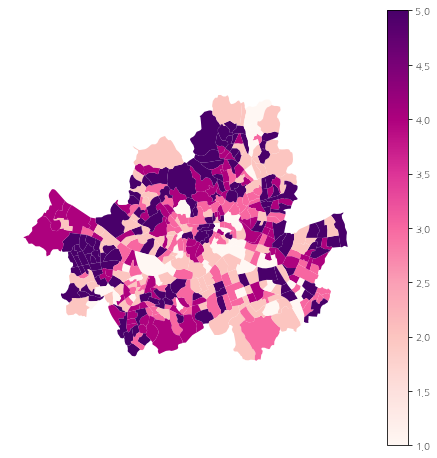

In [214]:
ax = df_eda.plot(column="공급미달점수_우선순위", figsize=(8,8), alpha=1, cmap='RdPu',legend=True).set_axis_off().get_figure()
plt.legend("공급미달점수_우선순위", fontsize=20)
plt.show()
ax.savefig("공급미달점수_우선순위.png")

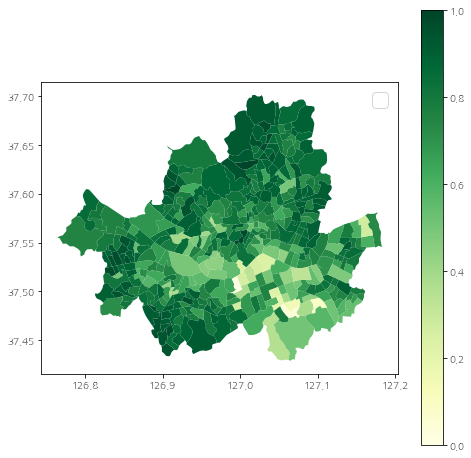

In [ ]:
ax = df_eda.plot(column="추정소득", figsize=(8,8), alpha=1, cmap='YlGn',legend=True).get_figure()
plt.legend("추정소득", fontsize=20)
plt.show()
ax.savefig("추정소득.png")

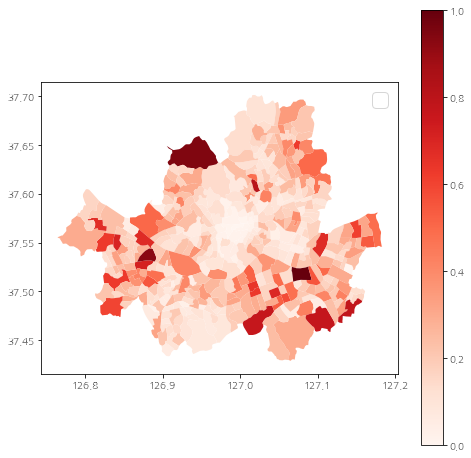

In [ ]:
ax = df_eda.plot(column="돌봄틈새공백인구", figsize=(8,8), alpha=1, cmap='Reds', legend=True).get_figure()
plt.legend("돌봄틈새공백인구", fontsize=20)
plt.show()
ax.savefig("돌봄틈새공백인구.png")

In [ ]:
ax = df_eda.plot(column="돌봄틈새공백인구", figsize=(8,8), alpha=1, cmap='Reds').get_figure()
plt.legend("돌봄틈새공백인구", fontsize=20)
plt.show()
ax.savefig("돌봄틈새공백인구.png")

In [ ]:
df_demand['행정동코드'] = df_demand['행정동코드'].astype(int)
df_alone['행정동코드'] = df_alone['행정동코드'].astype(int)
df_income['행정동코드'] = df_income['행정동코드'].astype(int)


df_1 = df_demand.merge(df_alone, on = '행정동코드')
df_percent = df_1.merge(df_income, on='행정동코드')

df_percent = df_percent[['행정동코드', '시군구명_x', '행정동명', '인프라지수percentile','돌봄틈새공백 분위','소득분위']]
df_percent.columns = ['행정동코드', '시군구', '행정동명', '인프라지수_분위','돌봄틈새공백인구_분위','추정소득_분위']
df_percent

,행정동코드,시군구,행정동명,인프라지수_분위,돌봄틈새공백인구_분위,추정소득_분위
0,1165065100,서초구,양재1동,1,10,2
1,1153078000,구로구,오류2동,1,10,4
2,1150063000,강서구,방화1동,1,10,5
3,1138069000,은평구,진관동,1,10,5
4,1138062500,은평구,역촌동,1,9,10
...,...,...,...,...,...,...
419,1114057000,중구,필동,10,1,8
420,1114059000,중구,광희동,10,1,3
421,1111054000,종로구,삼청동,10,1,4
422,1114060500,중구,을지로동,10,1,9


In [ ]:
df_demand['행정동코드'] = df_demand['행정동코드'].astype(int)
df_alone['행정동코드'] = df_alone['행정동코드'].astype(int)
df_income['행정동코드'] = df_income['행정동코드'].astype(int)

df_1 = df_demand.merge(df_alone, on = '행정동코드')
df_percent = df_1.merge(df_income, on='행정동코드')

df_percent = df_percent[['행정동코드', '시군구명_x', '행정동명', '인프라지수percentile','돌봄틈새공백 분위','소득분위']]
df_percent.columns = ['행정동코드', '시군구', '행정동명', '인프라지수_분위','돌봄틈새공백인구_분위','추정소득_분위']

df_eda_percent = dong_geo.merge(df_percent, on='행정동코드')
df_eda_percent

,행정동코드,시군구명,읍면동명,위도,경도,geometry,시군구,행정동명,인프라지수_분위,돌봄틈새공백인구_분위,추정소득_분위
0,1111053000,종로구,사직동,37.574108,126.970144,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...",종로구,사직동,8,2,3
1,1111054000,종로구,삼청동,37.588013,126.981114,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ...",종로구,삼청동,10,1,4
2,1111055000,종로구,부암동,37.596699,126.962557,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ...",종로구,부암동,8,2,8
3,1111056000,종로구,평창동,37.613965,126.969274,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ...",종로구,평창동,9,4,8
4,1111057000,종로구,무악동,37.577741,126.958989,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ...",종로구,무악동,9,3,3
...,...,...,...,...,...,...,...,...,...,...,...
419,1174069000,강동구,둔촌제1동,37.523145,127.140435,"MULTIPOLYGON (((127.14580 37.52199, 127.14564 ...",강동구,둔촌1동,10,1,2
420,1174070000,강동구,둔촌제2동,37.531514,127.147414,"MULTIPOLYGON (((127.15355 37.53400, 127.15357 ...",강동구,둔촌2동,3,7,6
421,1174057000,강동구,암사제1동,37.551855,127.134586,"MULTIPOLYGON (((127.14447 37.55477, 127.14319 ...",강동구,암사1동,4,9,8
422,1174061000,강동구,천호제2동,37.544691,127.122275,"MULTIPOLYGON (((127.13458 37.54712, 127.13115 ...",강동구,천호2동,4,7,2


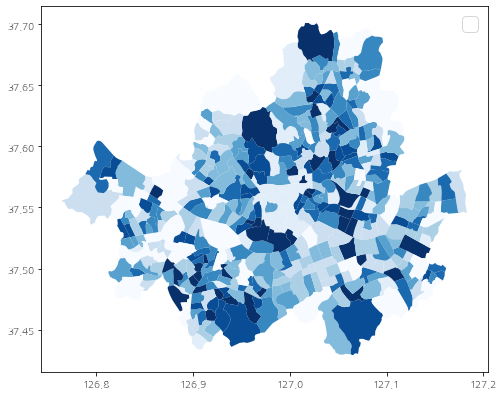

In [ ]:
ax = df_eda_percent.plot(column="인프라지수_분위", figsize=(8,8), alpha=1, cmap='Blues', legend=True).get_figure()
plt.legend("인프라지수_분위", fontsize=20)
plt.show()
ax.savefig("인프라지수_분위.png")

No handles with labels found to put in legend.


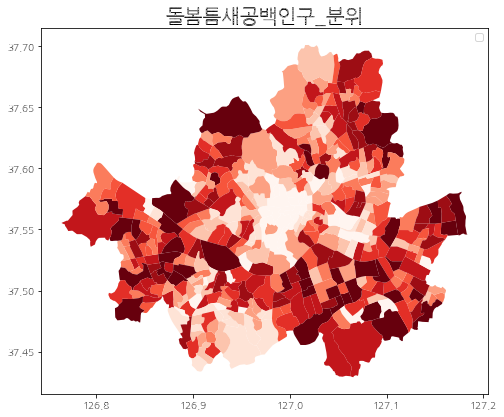

In [ ]:
ax = df_eda_percent.plot(column="돌봄틈새공백인구_분위", figsize=(8,8), alpha=1, cmap='Reds').get_figure()
plt.title("돌봄틈새공백인구_분위", fontsize=20)
plt.legend()
plt.show()
ax.savefig('돌봄틈새공백인구_분위.png')

No handles with labels found to put in legend.


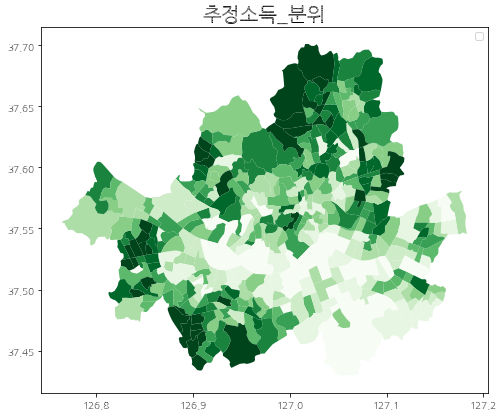

In [ ]:
ax = df_eda_percent.plot(column="추정소득_분위", figsize=(8,8), alpha=1, cmap='Greens').get_figure()
plt.title("추정소득_분위", fontsize=20)
plt.legend()
plt.show()
ax.savefig('추정소득_분위.png')

In [ ]:
df_infra =pd.read_pickle('/content/drive/My Drive/Project/Seoul/지수_결과/인프라지수1109.pkl')
df_infra['행정동코드'] = df_infra['행정동코드'].astype(int)
dong_geo['행정동코드'] = dong_geo['행정동코드'].astype(int)

df_eda_infra = dong_geo.merge(df_infra, on='행정동코드')
df_eda_infra

No handles with labels found to put in legend.


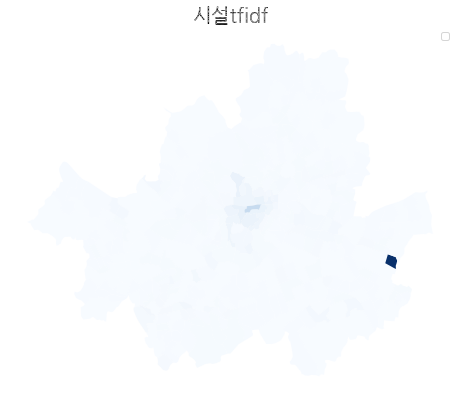

In [ ]:
ax = df_eda_infra.plot(column="시설tfidf", figsize=(8,8), alpha=1, cmap='Blues')
ax.set_axis_off()
plt.title("시설tfidf", fontsize=20)
plt.legend()
plt.show()

No handles with labels found to put in legend.


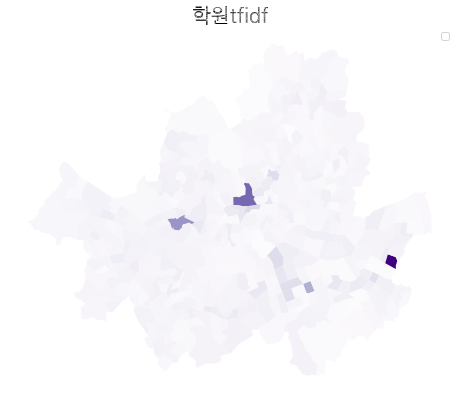

In [ ]:
ax = df_eda_infra.plot(column="학원tfidf", figsize=(8,8), alpha=1, cmap='Purples')
ax.set_axis_off()
plt.title("학원tfidf", fontsize=20)
plt.legend()
plt.show()

No handles with labels found to put in legend.


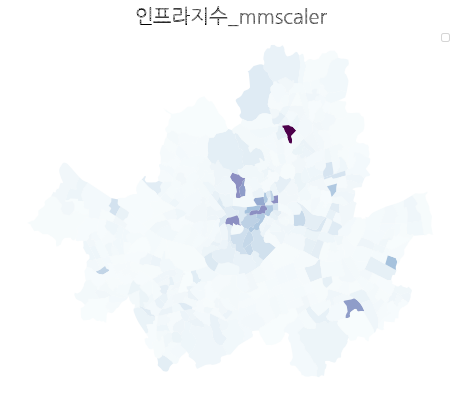

In [ ]:
ax = df_eda_infra.plot(column="인프라지수_mmscaler", figsize=(8,8), alpha=1, cmap='BuPu')
ax.set_axis_off()
plt.title("인프라지수_mmscaler", fontsize=20)
plt.legend()
plt.show()

In [ ]:
# 1순위 -> 먼저 설치해야 함
pt_list = np.percentile(df_eda_infra[['시설tfidf']],[i*10 for i in range(1,10,1)]).tolist()

df_eda_infra['시설tfidf_우선순위'] = 0
df_eda_infra.loc[df_eda_infra['시설tfidf'] <= pt_list[0], '시설tfidf_우선순위'] = 1
df_eda_infra.loc[(df_eda_infra['시설tfidf'] > pt_list[0]) & (df_eda_infra['시설tfidf'] <= pt_list[1]),'시설tfidf_우선순위'] = 2
df_eda_infra.loc[(df_eda_infra['시설tfidf'] > pt_list[1]) & (df_eda_infra['시설tfidf'] <= pt_list[2]),'시설tfidf_우선순위'] = 3
df_eda_infra.loc[(df_eda_infra['시설tfidf'] > pt_list[2]) & (df_eda_infra['시설tfidf'] <= pt_list[3]),'시설tfidf_우선순위'] = 4
df_eda_infra.loc[(df_eda_infra['시설tfidf'] > pt_list[3]) & (df_eda_infra['시설tfidf'] <= pt_list[4]),'시설tfidf_우선순위'] = 5
df_eda_infra.loc[(df_eda_infra['시설tfidf'] > pt_list[4]) & (df_eda_infra['시설tfidf'] <= pt_list[5]),'시설tfidf_우선순위'] = 6
df_eda_infra.loc[(df_eda_infra['시설tfidf'] > pt_list[5]) & (df_eda_infra['시설tfidf'] <= pt_list[6]),'시설tfidf_우선순위'] = 7
df_eda_infra.loc[(df_eda_infra['시설tfidf'] > pt_list[6]) & (df_eda_infra['시설tfidf'] <= pt_list[7]),'시설tfidf_우선순위'] = 8
df_eda_infra.loc[(df_eda_infra['시설tfidf'] > pt_list[7]) & (df_eda_infra['시설tfidf'] <= pt_list[8]),'시설tfidf_우선순위'] = 9
df_eda_infra.loc[(df_eda_infra['시설tfidf'] > pt_list[8]),'시설tfidf_우선순위'] = 10

AttributeError: ignored

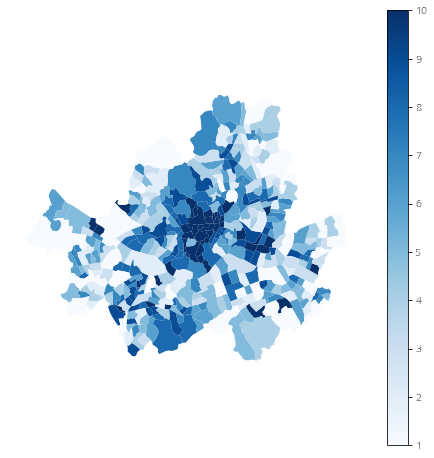

In [ ]:
# ax = df_eda_infra.plot(column="시설tfidf_우선순위", figsize=(8,8), alpha=1, cmap='Blues',legend=True).set_axis_off().get_figure()
# ax.set_axis_off()
# plt.title("시설tfidf_우선순위", fontsize=20)
# plt.legend()
# plt.show()


ax = df_eda_infra.plot(column="시설tfidf_우선순위", figsize=(8,8), alpha=1, cmap='Blues',legend=True).set_axis_off().get_figure()
plt.legend("시설tfidf_우선순위", fontsize=20)
plt.show()
ax.savefig("시설tfidf_우선순위.png")

In [ ]:
# 1순위 -> 먼저 설치해야 함
pt_list = np.percentile(df_eda_infra[['학원tfidf']],[i*10 for i in range(1,10,1)]).tolist()

df_eda_infra['학원tfidf_우선순위'] = 0
df_eda_infra.loc[df_eda_infra['학원tfidf'] <= pt_list[0], '학원tfidf_우선순위'] = 1
df_eda_infra.loc[(df_eda_infra['학원tfidf'] > pt_list[0]) & (df_eda_infra['학원tfidf'] <= pt_list[1]),'학원tfidf_우선순위'] = 2
df_eda_infra.loc[(df_eda_infra['학원tfidf'] > pt_list[1]) & (df_eda_infra['학원tfidf'] <= pt_list[2]),'학원tfidf_우선순위'] = 3
df_eda_infra.loc[(df_eda_infra['학원tfidf'] > pt_list[2]) & (df_eda_infra['학원tfidf'] <= pt_list[3]),'학원tfidf_우선순위'] = 4
df_eda_infra.loc[(df_eda_infra['학원tfidf'] > pt_list[3]) & (df_eda_infra['학원tfidf'] <= pt_list[4]),'학원tfidf_우선순위'] = 5
df_eda_infra.loc[(df_eda_infra['학원tfidf'] > pt_list[4]) & (df_eda_infra['학원tfidf'] <= pt_list[5]),'학원tfidf_우선순위'] = 6
df_eda_infra.loc[(df_eda_infra['학원tfidf'] > pt_list[5]) & (df_eda_infra['학원tfidf'] <= pt_list[6]),'학원tfidf_우선순위'] = 7
df_eda_infra.loc[(df_eda_infra['학원tfidf'] > pt_list[6]) & (df_eda_infra['학원tfidf'] <= pt_list[7]),'학원tfidf_우선순위'] = 8
df_eda_infra.loc[(df_eda_infra['학원tfidf'] > pt_list[7]) & (df_eda_infra['학원tfidf'] <= pt_list[8]),'학원tfidf_우선순위'] = 9
df_eda_infra.loc[(df_eda_infra['학원tfidf'] > pt_list[8]),'학원tfidf_우선순위'] = 1

AttributeError: ignored

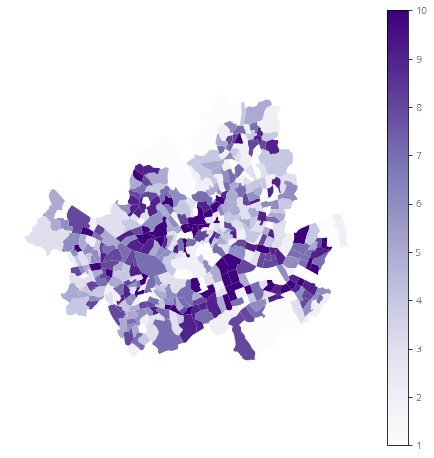

In [ ]:
# ax = df_eda_infra.plot(column="학원tfidf_우선순위", figsize=(8,8), alpha=1, cmap='Purples')
# ax.set_axis_off()
# plt.title("학원tfidf_우선순위", fontsize=20)
# plt.legend()
# plt.show()

ax = df_eda_infra.plot(column="학원tfidf_우선순위", figsize=(8,8), alpha=1, cmap='Purples',legend=True).set_axis_off().get_figure()
plt.legend("학원tfidf_우선순위", fontsize=20)
plt.show()
ax.savefig("학원tfidf_우선순위.png",  transparent=True)

In [ ]:
# 1순위 -> 먼저 설치해야 함
pt_list = np.percentile(df_eda_infra[['인프라지수_mmscaler']],[i*10 for i in range(1,10,1)]).tolist()

df_eda_infra['인프라지수_mmscaler_우선순위'] = 0
df_eda_infra.loc[df_eda_infra['인프라지수_mmscaler'] <= pt_list[0], '인프라지수_mmscaler_우선순위'] = 1
df_eda_infra.loc[(df_eda_infra['인프라지수_mmscaler'] > pt_list[0]) & (df_eda_infra['인프라지수_mmscaler'] <= pt_list[1]),'인프라지수_mmscaler_우선순위'] = 2
df_eda_infra.loc[(df_eda_infra['인프라지수_mmscaler'] > pt_list[1]) & (df_eda_infra['인프라지수_mmscaler'] <= pt_list[2]),'인프라지수_mmscaler_우선순위'] = 3
df_eda_infra.loc[(df_eda_infra['인프라지수_mmscaler'] > pt_list[2]) & (df_eda_infra['인프라지수_mmscaler'] <= pt_list[3]),'인프라지수_mmscaler_우선순위'] = 4
df_eda_infra.loc[(df_eda_infra['인프라지수_mmscaler'] > pt_list[3]) & (df_eda_infra['인프라지수_mmscaler'] <= pt_list[4]),'인프라지수_mmscaler_우선순위'] = 5
df_eda_infra.loc[(df_eda_infra['인프라지수_mmscaler'] > pt_list[4]) & (df_eda_infra['인프라지수_mmscaler'] <= pt_list[5]),'인프라지수_mmscaler_우선순위'] = 6
df_eda_infra.loc[(df_eda_infra['인프라지수_mmscaler'] > pt_list[5]) & (df_eda_infra['인프라지수_mmscaler'] <= pt_list[6]),'인프라지수_mmscaler_우선순위'] = 7
df_eda_infra.loc[(df_eda_infra['인프라지수_mmscaler'] > pt_list[6]) & (df_eda_infra['인프라지수_mmscaler'] <= pt_list[7]),'인프라지수_mmscaler_우선순위'] = 8
df_eda_infra.loc[(df_eda_infra['인프라지수_mmscaler'] > pt_list[7]) & (df_eda_infra['인프라지수_mmscaler'] <= pt_list[8]),'인프라지수_mmscaler_우선순위'] = 9
df_eda_infra.loc[(df_eda_infra['인프라지수_mmscaler'] > pt_list[8]),'인프라지수_mmscaler_우선순위'] = 10

AttributeError: ignored

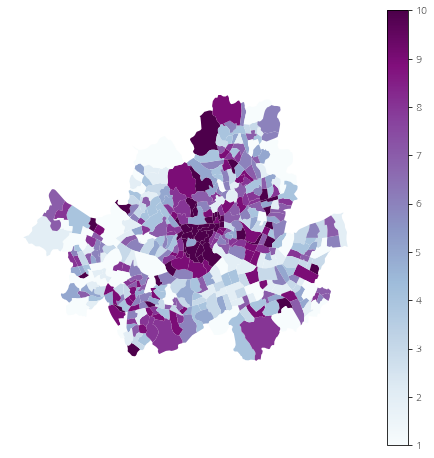

In [ ]:
# ax = df_eda_infra.plot(column="인프라지수_mmscaler_우선순위", figsize=(8,8), alpha=1, cmap='Purples').get_figure()
# # plt.legend("인프라지수_mmscaler_우선순위", fontsize=20)
# ax.set_axis_off()
# plt.title("인프라지수_mmscaler_우선순위", fontsize=20)
# plt.legend()
# plt.show()

ax = df_eda_infra.plot(column="인프라지수_mmscaler_우선순위", figsize=(8,8), alpha=1, cmap='BuPu',legend=True).set_axis_off().get_figure()
# ax.set_axis_off()
plt.legend("인프라지수_mmscaler_우선순위", fontsize=20)
plt.show()
ax.savefig("인프라지수_mmscaler_우선순위.png",  transparent=True)

In [ ]:
df_eda_infra.sort_values('인프라지수_mmscaler',ascending=False)

,행정동코드,시군구명_x,읍면동명,위도,경도,geometry,행정동,시군구명_y,5-14세,키움센터_개수,초등돌봄교실_교실개수,지역아동센터_개수,방과후아카데미_개수,총시설수,시설tfidf,예술학원,보습학원개수,총학원수,학원tfidf,인프라지수,인프라지수_mmscaler,인프라지수percentile,시설tfidf_우선순위,학원tfidf_우선순위,인프라지수_mmscaler_우선순위
131,1130560300,강북구,번2동,37.629515,127.034795,"MULTIPOLYGON (((127.03848 37.63391, 127.04148 ...",번2동,강북구,918,0.0,0.0,1.0,0.0,1.0,0.001458,0,0.0,0.0,0.000003,566.866628,1.000000,10,9,1,10
22,1114059000,중구,광희동,37.565204,127.003625,"MULTIPOLYGON (((127.00957 37.56303, 127.00670 ...",광희동,중구,170,0.0,0.0,0.0,0.0,0.0,0.008202,1,0.0,1.0,0.000028,295.243036,0.520456,10,10,2,10
18,1114054000,중구,회현동,37.556968,126.976709,"MULTIPOLYGON (((126.98536 37.55424, 126.98543 ...",회현동,중구,224,0.0,0.0,0.0,0.0,0.0,0.006225,1,0.0,1.0,0.000021,295.243036,0.520456,10,10,1,10
14,1111071000,종로구,숭인제2동,37.574307,127.020638,"MULTIPOLYGON (((127.02317 37.57804, 127.02337 ...",숭인제2동,종로구,297,0.0,0.0,0.0,0.0,0.0,0.004695,1,0.0,1.0,0.000016,295.243036,0.520456,10,10,1,10
1,1111054000,종로구,삼청동,37.588013,126.981114,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ...",삼청동,종로구,165,0.0,0.0,0.0,0.0,0.0,0.008450,1,0.0,1.0,0.000029,295.243036,0.520456,10,10,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,1159066000,동작구,대방동,37.507114,126.928026,"MULTIPOLYGON (((126.93304 37.51576, 126.93304 ...",대방동,동작구,3487,0.0,17.0,1.0,0.0,18.0,0.000112,27,45.0,72.0,0.000049,2.264878,0.003212,1,1,7,1
270,1153078000,구로구,오류제2동,37.484199,126.834603,"MULTIPOLYGON (((126.84814 37.49046, 126.84790 ...",오류제2동,구로구,4507,1.0,17.0,2.0,0.0,20.0,0.000062,44,26.0,70.0,0.000037,1.663341,0.002150,1,1,4,1
374,1168070000,강남구,세곡동,37.471075,127.104348,"MULTIPOLYGON (((127.11104 37.48294, 127.11109 ...",세곡동,강남구,5610,1.0,21.0,1.0,0.0,23.0,0.000020,26,15.0,41.0,0.000018,1.124735,0.001199,1,1,1,1
188,1138069000,은평구,진관동,37.639279,126.940518,"MULTIPOLYGON (((126.97179 37.63229, 126.97020 ...",진관동,은평구,7384,1.0,21.0,1.0,0.0,23.0,0.000015,37,27.0,64.0,0.000021,0.726752,0.000496,1,1,1,1


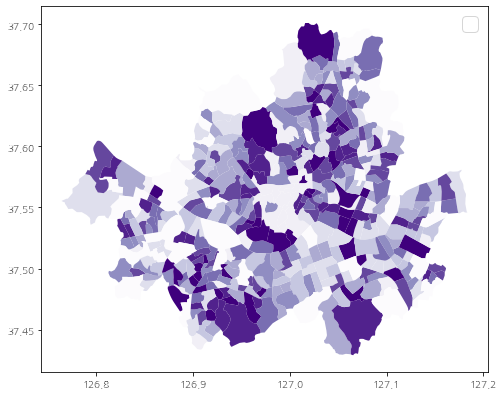

In [ ]:
# ax = df_eda_infra.plot(column="인프라지수percentile", figsize=(8,8), alpha=1, cmap='BuPu')
# ax.set_axis_off()
# plt.title("인프라지수percentile", fontsize=20)
# plt.legend()
# plt.show()

ax = df_eda_infra.plot(column="인프라지수percentile", figsize=(8,8), alpha=1, cmap='BuPu',legend=True).get_figure()
plt.legend("인프라지수percentile", fontsize=20)
plt.show()
ax.savefig("인프라지수percentile.png")

In [ ]:
ax = df_eda.plot(column="돌봄틈새공백인구", figsize=(8,8), alpha=1, cmap='Reds').get_figure()
plt.legend("돌봄틈새공백인구", fontsize=20)
plt.show()
ax.savefig("돌봄틈새공백인구.png")

In [218]:
df_eda_gu = df_eda.groupby(by='시군구명').sum()
df_eda_gu

,행정동코드,위도,경도,인프라지수,돌봄틈새공백인구,추정소득,추정소득_inverse,MinMax_수요지수,동별_필요센터수,키움센터_개수,공급미달점수,공급미달점수_우선순위,초등돌봄교실_교실개수,지역아동센터_개수,방과후아카데미_개수
시군구명,,,,,,,,,,,,,,,
강남구,25697394300,824.977602,2795.272511,1.006230,6.737134,9.853639,24553.416104,17.597004,16.260921,4.0,12.260921,53,107.0,4.0,1.0
강동구,21133081000,675.829833,2288.562150,0.722671,4.928017,12.916916,32186.526582,18.567603,17.157826,1.0,16.157826,69,94.0,23.0,1.0
강북구,14697273000,489.210247,1651.279451,1.574175,2.060012,11.265016,28070.303972,14.899203,13.767955,0.0,13.767955,56,48.0,22.0,1.0
강서구,23001165800,751.086570,2536.827333,0.682210,5.821664,16.883896,42071.494723,23.387769,21.612013,2.0,19.612013,83,118.0,21.0,1.0
관악구,24403367000,787.012045,2665.732573,0.956495,2.487890,17.543317,43714.648199,20.987702,19.394175,0.0,19.394175,80,92.0,27.0,0.0
광진구,16823696700,563.206025,1906.246738,0.720151,2.695466,11.862451,29558.998312,15.278067,14.118054,2.0,12.118054,53,69.0,14.0,0.0
구로구,17295984500,562.426625,1902.977388,0.446219,3.703964,12.471896,31077.620368,16.622079,15.360019,8.0,7.360019,47,103.0,26.0,0.0
금천구,11545646000,374.602593,1269.035942,0.383623,1.422913,9.211358,22952.974293,11.017894,10.181342,0.0,10.181342,44,60.0,28.0,0.0
노원구,21566204700,715.330946,2414.308826,0.418119,5.800576,15.807590,39389.542608,22.026284,20.353901,22.0,-1.646099,41,127.0,23.0,0.0


In [220]:
dong_geo

,행정동코드,시군구명,읍면동명,위도,경도,geometry
0,1111053000,종로구,사직동,37.574108,126.970144,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,1111054000,종로구,삼청동,37.588013,126.981114,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,1111055000,종로구,부암동,37.596699,126.962557,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,1111056000,종로구,평창동,37.613965,126.969274,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,1111057000,종로구,무악동,37.577741,126.958989,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."
...,...,...,...,...,...,...
419,1174069000,강동구,둔촌제1동,37.523145,127.140435,"MULTIPOLYGON (((127.14580 37.52199, 127.14564 ..."
420,1174070000,강동구,둔촌제2동,37.531514,127.147414,"MULTIPOLYGON (((127.15355 37.53400, 127.15357 ..."
421,1174057000,강동구,암사제1동,37.551855,127.134586,"MULTIPOLYGON (((127.14447 37.55477, 127.14319 ..."
422,1174061000,강동구,천호제2동,37.544691,127.122275,"MULTIPOLYGON (((127.13458 37.54712, 127.13115 ..."


AttributeError: ignored

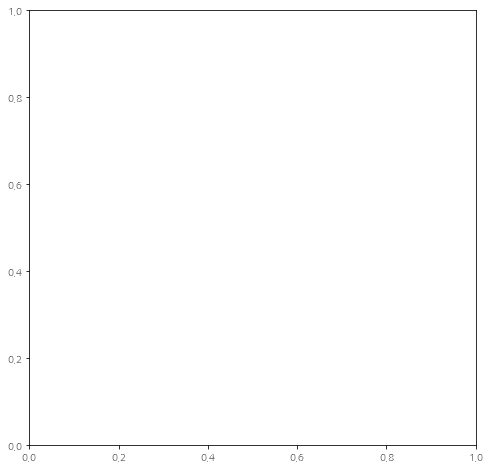

In [219]:
ax = df_eda_gu.plot(column="키움센터_개수", figsize=(8,8), alpha=1, cmap='BuPu',legend=True).get_figure()
plt.legend("키움센터_개수", fontsize=20)
plt.show()
ax.savefig("키움센터_개수.png")

## EDA

In [ ]:
# 각 돌봄기관 데이터 import
df_dolbom = gpd.read_file('/content/drive/My Drive/Project/Seoul/가공데이터/키움센터_위치_행정동.geojson')
df_local =  gpd.read_file('/content/drive/My Drive/Project/Seoul/가공데이터/지역아동센터_위치포함.geojson')
df_after =  gpd.read_file('/content/drive/My Drive/Project/Seoul/가공데이터/방과후아카데미_위치포함.geojson')

# 학교별 전체 데이터 import 
df_school = pd.read_pickle('/content/drive/My Drive/Project/Seoul/가공데이터/학교별_주변공적돌봄시설.pickle')

In [ ]:
dong_geo = gpd.read_file('/content/drive/My Drive/Project/Seoul/서울시_행정동경계/hangjeongdong_boundary.geojson')
dong_geo

,행정동코드,시군구명,읍면동명,위도,경도,geometry
0,1111053000,종로구,사직동,37.574108,126.970144,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,1111054000,종로구,삼청동,37.588013,126.981114,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,1111055000,종로구,부암동,37.596699,126.962557,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,1111056000,종로구,평창동,37.613965,126.969274,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,1111057000,종로구,무악동,37.577741,126.958989,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."
...,...,...,...,...,...,...
419,1174069000,강동구,둔촌제1동,37.523145,127.140435,"MULTIPOLYGON (((127.14580 37.52199, 127.14564 ..."
420,1174070000,강동구,둔촌제2동,37.531514,127.147414,"MULTIPOLYGON (((127.15355 37.53400, 127.15357 ..."
421,1174057000,강동구,암사제1동,37.551855,127.134586,"MULTIPOLYGON (((127.14447 37.55477, 127.14319 ..."
422,1174061000,강동구,천호제2동,37.544691,127.122275,"MULTIPOLYGON (((127.13458 37.54712, 127.13115 ..."


In [ ]:
with open('/content/drive/My Drive/Project/Seoul/인구/행정동별_5-14세_거주인구.pkl', 'rb') as f:  
  df_child = pickle.load(f)

In [ ]:
import folium 
from folium import plugins

center = (37.5642135, 127.0016985)
zoom = 13


m = folium.Map(location=center, zoom_start=zoom)
# m = folium.Map(location=center, zoom_start=zoom, tiles='cartodbpositron')
folium.Choropleth(
    geo_data = dong_geo,
    data = df_final,
    columns = ('행정동코드', 'MinMax_수요지수'),
    key_on = 'feature.properties.행정동코드',
    fill_color = 'BuPu',
    legend_name = 'MinMax_수요지수'
).add_to(m)

# # 초등돌봄교실 
# for index, row in df_school.iterrows():
#   title = f"{row['학교명']} - 돌봄교실 인원: {row['초등돌봄교실_이용인원']}"
#   # folium.Marker([row['초등학교_위도'], row['초등학교_경도']], popup=title, icon=folium.Icon(icon ='star', color = 'red')).add_to(m)
#   folium.CircleMarker([row['초등학교_위도'], row['초등학교_경도']], popup=title, radius=1,color = 'red').add_to(m)
#   # folium.Circle([row['초등학교_위도'], row['초등학교_경도']], radius =800, fill='#ececec', color = '#ececec').add_to(m)

# # 우리동네키움센터 
# for index, row in df_dolbom.iterrows():
#   title = f"{row['시설ID']} - 상시: {row['상시돌봄']} - 일시: {row['일시돌봄']}"
#   folium.Marker([row['Latitude'], row['Longitude']], popup=title,icon=folium.Icon(icon = 'dumbell', color='orange')).add_to(m)

# # 지역아동센터
# for index, row in df_local.iterrows():
#   title = f"{row['시설명']} - 정원: {row['입소정원(명)']}"
#   folium.Marker([row['Latitude'], row['Longitude']], popup=title,icon=folium.Icon(icon = 'dumbell', color='green')).add_to(m)

# # 방과후아카데미
# for index, row in df_after.iterrows():
#   title = f"{row['시설명']} - 정원: {row['초등학생 수용인원(정원)']}"
#   folium.Marker([row['Latitude'], row['Longitude']], popup=title,icon=folium.Icon(icon = 'dumbell', color='purple')).add_to(m)

m

In [ ]:
m.save('./공적돌봄시설_초등학생인구구별.html')

In [ ]:
import folium 
from folium import plugins

center = (37.5642135, 127.0016985)
zoom = 13


m = folium.Map(location=center, zoom_start=zoom)
# m = folium.Map(location=center, zoom_start=zoom, tiles='cartodbpositron')
folium.Choropleth(
    geo_data = dong_geo,
    data = df_child,
    columns = ('동', '5~14세'),
    key_on = 'feature.properties.읍면동명',
    fill_color = 'Blues',
    legend_name = '초등학생_인구'
).add_to(m)

# 초등돌봄교실 
for index, row in df_school.iterrows():
  title = f"{row['학교명']} - 돌봄교실 인원: {row['초등돌봄교실_이용인원']}"
  # folium.Marker([row['초등학교_위도'], row['초등학교_경도']], popup=title, icon=folium.Icon(icon ='star', color = 'red')).add_to(m)
  folium.CircleMarker([row['초등학교_위도'], row['초등학교_경도']], popup=title, radius=1,color = 'red').add_to(m)
  # folium.Circle([row['초등학교_위도'], row['초등학교_경도']], radius =800, fill='#ececec', color = '#ececec').add_to(m)

# 우리동네키움센터 
for index, row in df_dolbom.iterrows():
  title = f"{row['시설ID']} - 상시: {row['상시돌봄']} - 일시: {row['일시돌봄']}"
  folium.Marker([row['Latitude'], row['Longitude']], popup=title,icon=folium.Icon(icon = 'dumbell', color='orange')).add_to(m)

# 지역아동센터
for index, row in df_local.iterrows():
  title = f"{row['시설명']} - 정원: {row['입소정원(명)']}"
  folium.Marker([row['Latitude'], row['Longitude']], popup=title,icon=folium.Icon(icon = 'dumbell', color='green')).add_to(m)

# 방과후아카데미
for index, row in df_after.iterrows():
  title = f"{row['시설명']} - 정원: {row['초등학생 수용인원(정원)']}"
  folium.Marker([row['Latitude'], row['Longitude']], popup=title,icon=folium.Icon(icon = 'dumbell', color='purple')).add_to(m)

m

In [ ]:
import folium 
from folium import plugins

center = (37.5642135, 127.0016985)
zoom = 13


m = folium.Map(location=center, zoom_start=zoom)
# m = folium.Map(location=center, zoom_start=zoom, tiles='cartodbpositron')
folium.Choropleth(
    geo_data = dong_geo,
    data = df_child,
    columns = ('동', '5~14세'),
    key_on = 'feature.properties.읍면동명',
    fill_color = 'Blues',
    legend_name = '초등학생_인구'
).add_to(m)

# 초등돌봄교실 
for index, row in df_school.iterrows():
  title = f"{row['학교명']} - 돌봄교실 인원: {row['초등돌봄교실_이용인원']}"
  # folium.Marker([row['초등학교_위도'], row['초등학교_경도']], popup=title, icon=folium.Icon(icon ='star', color = 'red')).add_to(m)
  folium.CircleMarker([row['초등학교_위도'], row['초등학교_경도']], popup=title, radius=1,color = 'red').add_to(m)
  # folium.Circle([row['초등학교_위도'], row['초등학교_경도']], radius =800, fill='#ececec', color = '#ececec').add_to(m)

# 우리동네키움센터 
for index, row in df_dolbom.iterrows():
  title = f"{row['시설ID']} - 상시: {row['상시돌봄']} - 일시: {row['일시돌봄']}"
  folium.Marker([row['Latitude'], row['Longitude']], popup=title,icon=folium.Icon(icon = 'dumbell', color='orange')).add_to(m)

# 지역아동센터
for index, row in df_local.iterrows():
  title = f"{row['시설명']} - 정원: {row['입소정원(명)']}"
  folium.Marker([row['Latitude'], row['Longitude']], popup=title,icon=folium.Icon(icon = 'dumbell', color='green')).add_to(m)

# 방과후아카데미
for index, row in df_after.iterrows():
  title = f"{row['시설명']} - 정원: {row['초등학생 수용인원(정원)']}"
  folium.Marker([row['Latitude'], row['Longitude']], popup=title,icon=folium.Icon(icon = 'dumbell', color='purple')).add_to(m)

m

In [ ]:
m.save('/content/공적돌봄시설_초등학생인구_동별.html')